In [1]:
import time
import os
import json
import struct

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Load data

In [2]:
download_path = "/home/lupi/Project/LocalData/"

fr = open(download_path+'temp_q_00005.dat', 'rb')
real = bytearray(fr.read())

fi = open(download_path+'temp_i_00005.dat', 'rb')
imag = bytearray(fi.read())

In [3]:
n_samples = len(real) // 4 # 8192 * 2**10 = 2**13 * 2**10
n_bins = 4 * 2**10
n_fft = n_samples // n_bins
S_R = 2 * 10**6 # sample rate
delta_nu = S_R / n_bins

print("N. samples:", n_samples,
      "\nN. bins in frequency spectrum:", n_bins,
      "\nN. of FFT computed:", n_fft,
      "\ndelta_nu:", delta_nu)

N. samples: 8388608 
N. bins in frequency spectrum: 4096 
N. of FFT computed: 2048 
delta_nu: 488.28125


In [13]:
real[1]

199

In [12]:
rval = struct.unpack('f'*(len(real)//4), real)
ival = struct.unpack('f'*(len(imag)//4), imag)


In [17]:
def chunks(L, n):
    """ Yield successive n-sized chunks from L.
    """
    for i in range(0, len(L), n):
        yield L[i:i+n]

In [26]:
r = np.array(list(chunks(rval, n_bins)))
i = np.array(list(chunks(ival, n_bins)))

In [42]:
v = r + 1j*i
v.shape

(2048, 4096)

In [39]:
f = np.fft.fft(v)

In [41]:
f.shape

(2048, 4096)

In [44]:
p = np.abs(f)

In [51]:
p.shape

(2048, 4096)

In [48]:
p_mean = np.mean(p, axis=0)

In [49]:
p_mean.shape

(4096,)

In [55]:
freq = np.fft.fftfreq(n_bins, d=1/delta_nu)

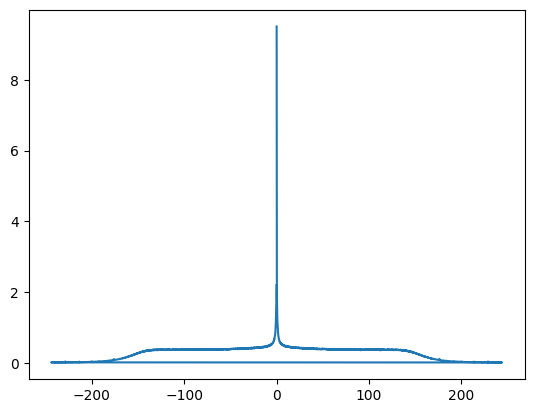

In [56]:
plt.plot(freq, p_mean)

In [57]:
freq

array([ 0.        ,  0.11920929,  0.23841858, ..., -0.35762787,
       -0.23841858, -0.11920929])